# PA 2: Classification - Decision Tree

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


##External Citation: https://www.datacamp.com/community/tutorials/pandas-read-csv ##

#Loading cardio_train dataset available in csv format.Dropped id as it is of low importance
df = pd.read_csv("cardio_train.csv",sep = ';').drop(["id"],axis=1)
#Please modify the first attribute of the read_csv() to point to the the database file available in your local system.



In [98]:
#Displaying first five records of the cardio_train dataset
print (">>Task 2: First five records of the cardio_train csv file : \n", df.head(5))

#Displaying last five records of the cardio_train dataset
print (">>Task 2: Last five records of the cardio_train csv file : \n", df.tail(5))

>>Task 2: First five records of the cardio_train csv file : 
      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
>>Task 2: Last five records of the cardio_train csv file : 
          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
Info of the Cardio_train data set:
 None



 The cardio class values and count: 
 0    35021
1    34979
Name: cardio, dtype: int64


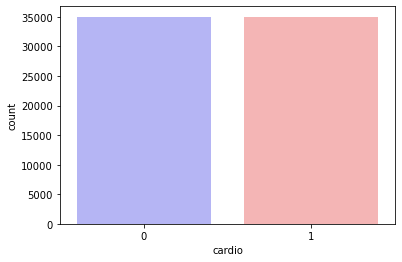

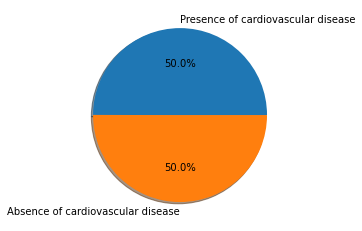

Percentage of Patients Haven't Heart Disease: 50.03%
Percentage of Patients Have Heart Disease: 49.97%




In [99]:
##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##


#Displaying info of cardio_train dataset
print("Info of the Cardio_train data set:\n",df.info())
#Displaying the values of the cardio class
print("\n\n\n The cardio class values and count: \n", df.cardio.value_counts())

#Data Exploration of Target Variable or Class "Cardio".

#Countting the values of 'Cardio'
df.cardio.value_counts()
#plotting a graph for the Cardio value counts
sns.countplot(x="cardio", data=df, palette="bwr")
#to show the plot
plt.show()

#Specifying the labels
labels = ['Presence of cardiovascular disease', 'Absence of cardiovascular disease']
#Assigning the count of records to sizes.
sizes = [len(df[df.cardio == 1]),len(df[df.cardio == 0])] 
#Plotting the Pie graph
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
#to show the plot
plt.show()

#countNoDisease consists of Count of records with Cardio = 0 value
countNoDisease = len(df[df.cardio == 0])
#countHaveDisease consists of Count of records with Cardio = 1 value
countHaveDisease = len(df[df.cardio == 1])
#Calculating the percentage of records with Cardio = 0 and displaying it.
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.cardio))*100)))
#Calculating the percentage of records with Cardio = 1 and displaying it.
print("Percentage of Patients Have Heart Disease: {:.2f}%\n\n".format((countHaveDisease / (len(df.cardio))*100)))

In [100]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##


#Pre-Processing applied to the dataset

#checking for null values
print(df.isnull().values.any())

#Data Cleansing
#As the maximum height is 250cm and the maximum weight is 200kg and the maximum BMI value which is derived from height and weight is 298 which has irrelevant values when considering and comparing it with each other. Therefore, irrelevant data were removed and generalized the dataset by removing the outliers as follows.
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
#As Diastolic blood pressure(ap_lo) cannot exceed Systolic blood pressure(ap_hi) because systolic pressure is the maximum pressure the heart exerts while beating and the diastolic pressure is the amount of pressure in arteries between beats. Also, the numeric difference between Systolic blood pressure and Diastolic blood pressure known as blood pressure, and it cannot be a negative value. By considering these facts outliers from ap_hi and ap_lo have removed to get rid of inaccurate blood pressure data.
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

#Feature Selection
df["bmi_index"] = df["weight"] / (df["height"]/100)**2
#External Citation:https://datatofish.com/if-condition-in-pandas-dataframe/#:~:text=Applying%20an%20IF%20condition%20in%20Pandas%20DataFrame&text=You%20then%20want%20to%20apply,assign%20the%20value%20of%20'False'
#categorizing bmi_index values as 0 -> underweight, 1 -> normal , 2 -> over-weight
df.loc[df["bmi_index"] < 18.5, "bmi_index"] = 0 
df.loc[(df["bmi_index"] >= 18.5) & (df["bmi_index"] < 25), "bmi_index"] = 1
df.loc[df["bmi_index"] >= 25, "bmi_index"] = 2 
#External Citation:https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/
df["bmi_index"]= df["bmi_index"].astype(np.int64)
#categorizing Blood pressure considering the ranges specified in below citation link values as 0 -> Normal, 1 -> Elevated  , 2 -> Hypertension
#External Citation:https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines
df.loc[(df["ap_lo"] < 80) & (df["ap_hi"] < 120), "blood_pressure"] = 0 
df.loc[(df["ap_lo"] < 80) & (df["ap_hi"] >= 120) & (df["ap_hi"] <= 129), "blood_pressure"] = 1
df.loc[((((df["ap_lo"] >= 80) & (df["ap_lo"] <= 89)) | ((df["ap_hi"] >= 130) & (df["ap_hi"] <= 139))) | ((df["ap_lo"] >= 90) | (df["ap_hi"] >= 140))), "blood_pressure"] = 2 
df["blood_pressure"]= df["blood_pressure"].astype(np.int64)
#As max age is 65 and min age is 30,creating new column age_range as 0 if age is between 30-40, 1 if age is between 41-50, 2 if age is between 51-60 and 3 if age is above 60
df["age"] = round(df["age"] / 365)
df.loc[(df["age"] >= 30) & (df["age"] <= 40), "age_range"] = 0 
df.loc[(df["age"] >= 41) & (df["age"] <= 50), "age_range"] = 1
df.loc[(df["age"] >= 51) & (df["age"] <= 60), "age_range"] = 2 
df.loc[df["age"] > 60, "age_range"] = 3
df["age_range"]= df["age_range"].astype(np.int64)


#Dropping Features as new feature based on these features are created.

#Created bmi_index feature based on height and weight.
df=df.drop(["height"],axis=1)  
df=df.drop(["weight"],axis=1)
#Created bloodpresure feature based on ap_hi, ap_lo.
df=df.drop(["ap_hi"],axis=1)
df=df.drop(["ap_lo"],axis=1)
#Created age_range feature based on age.
df=df.drop(["age"],axis=1)

#Displaying info of cardio_train dataset after preprocessing.
print("Info of the dataset after preprocessing the data:\n",df.info())


False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          60142 non-null  int64
 1   cholesterol     60142 non-null  int64
 2   gluc            60142 non-null  int64
 3   smoke           60142 non-null  int64
 4   alco            60142 non-null  int64
 5   active          60142 non-null  int64
 6   cardio          60142 non-null  int64
 7   bmi_index       60142 non-null  int64
 8   blood_pressure  60142 non-null  int64
 9   age_range       60142 non-null  int64
dtypes: int64(10)
memory usage: 5.0 MB
Info of the dataset after preprocessing the data:
 None


In [101]:

#Displaying first five records of the cardio_train dataset
print (">>Task 2: First five records of the cardio_train csv file : \n", df.head(5))

#Displaying last five records of the cardio_train dataset
print (">>Task 2: Last five records of the cardio_train csv file : \n", df.tail(5))

>>Task 2: First five records of the cardio_train csv file : 
    gender  cholesterol  gluc  smoke  alco  active  cardio  bmi_index  \
0       2            1     1      0     0       1       0          1   
1       1            3     1      0     0       1       1          2   
2       1            3     1      0     0       0       1          1   
3       2            1     1      0     0       1       1          2   
4       1            1     1      0     0       0       0          1   

   blood_pressure  age_range  
0               2          1  
1               2          2  
2               2          2  
3               2          1  
4               0          1  
>>Task 2: Last five records of the cardio_train csv file : 
        gender  cholesterol  gluc  smoke  alco  active  cardio  bmi_index  \
69993       1            1     1      0     0       1       1          1   
69994       1            1     1      0     0       1       1          2   
69995       2            1    

In [102]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

#Labels
Y = df['cardio']
#Features
X = df.drop(['cardio'], axis = 1)  
#Splitting 70% of dataset for training, and 30% for testing the model.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)


# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]


4) Print the decision tree visualization.  [5 points]


Gini is used to measure quality of Split 

Confusion Matrix: 
 [[5867 3383]
 [3162 5631]]


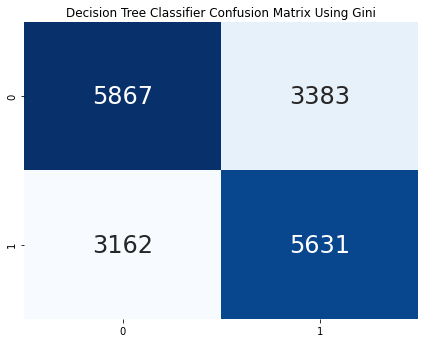


Classification Report Using Gini:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      9250
           1       0.62      0.64      0.63      8793

    accuracy                           0.64     18043
   macro avg       0.64      0.64      0.64     18043
weighted avg       0.64      0.64      0.64     18043


Classification Tree Using Gini:



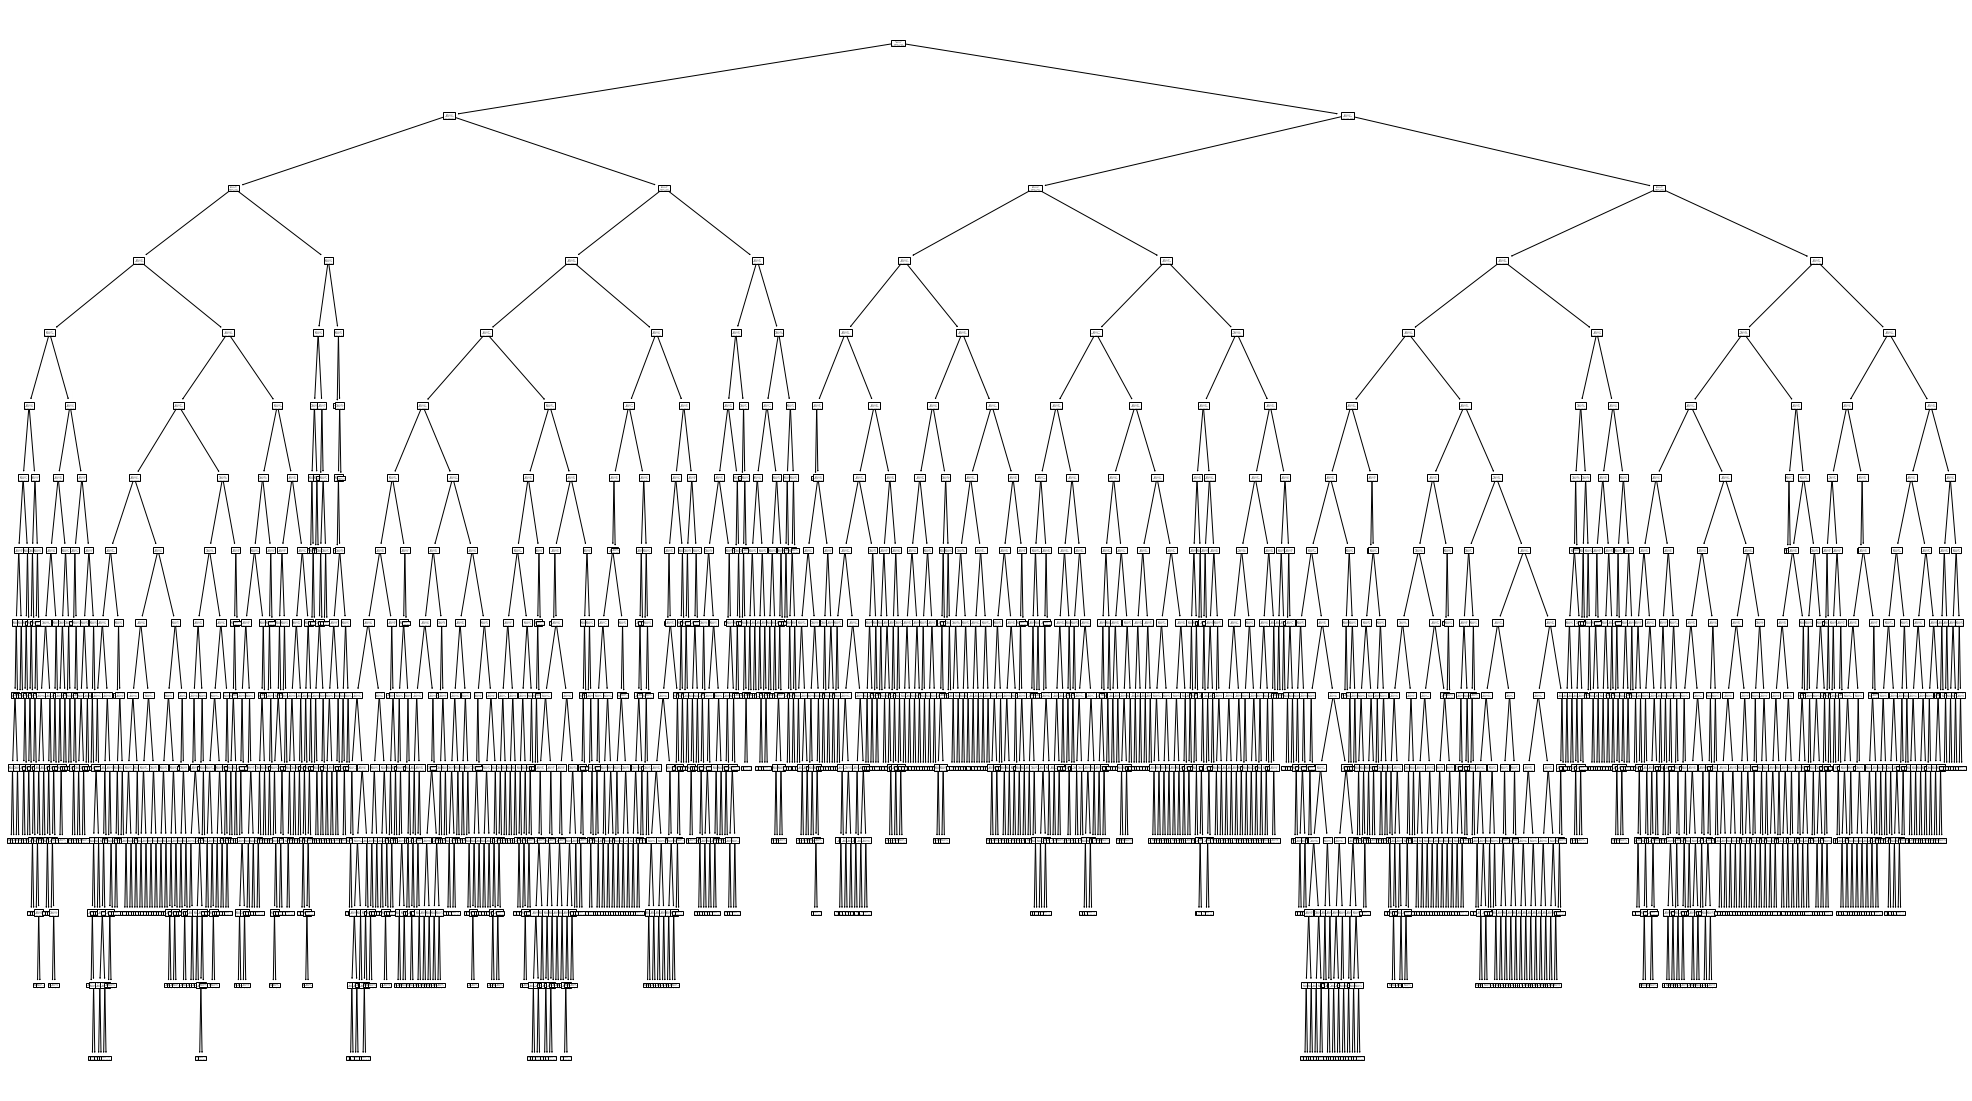

In [103]:
##External Citation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html ##

#gini_clf is the Decision Tree Classifier with gini to measure the quality of split.
gini_clf = DecisionTreeClassifier(criterion="gini")
#Training the model by fitting it for train data set.
gini_clf = gini_clf.fit(X_train, y_train)
#Assigning the predicted values to gini_y_pred
gini_y_pred = gini_clf.predict(X_test)

#Displaying the Confusion Matrix
print("Gini is used to measure quality of Split \n\nConfusion Matrix: \n",confusion_matrix(y_test, gini_y_pred))

##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#Specifying the size of the figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying the title
plt.title("Decision Tree Classifier Confusion Matrix Using Gini")
#plotting the graph
sns.heatmap(confusion_matrix(y_test, gini_y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plotted graph
plt.show()

#Displaying the classification Report
print("\nClassification Report Using Gini:\n",classification_report(y_test, gini_y_pred))

#Visualization of the Classification Tree
print("\nClassification Tree Using Gini:\n")
#Specifying the size of the figure
plt.figure(figsize=(35,20))
#plotting the tree
plot_tree(gini_clf)
#To show the plot
plt.show()



Classification Tree using gini with max depth 3:


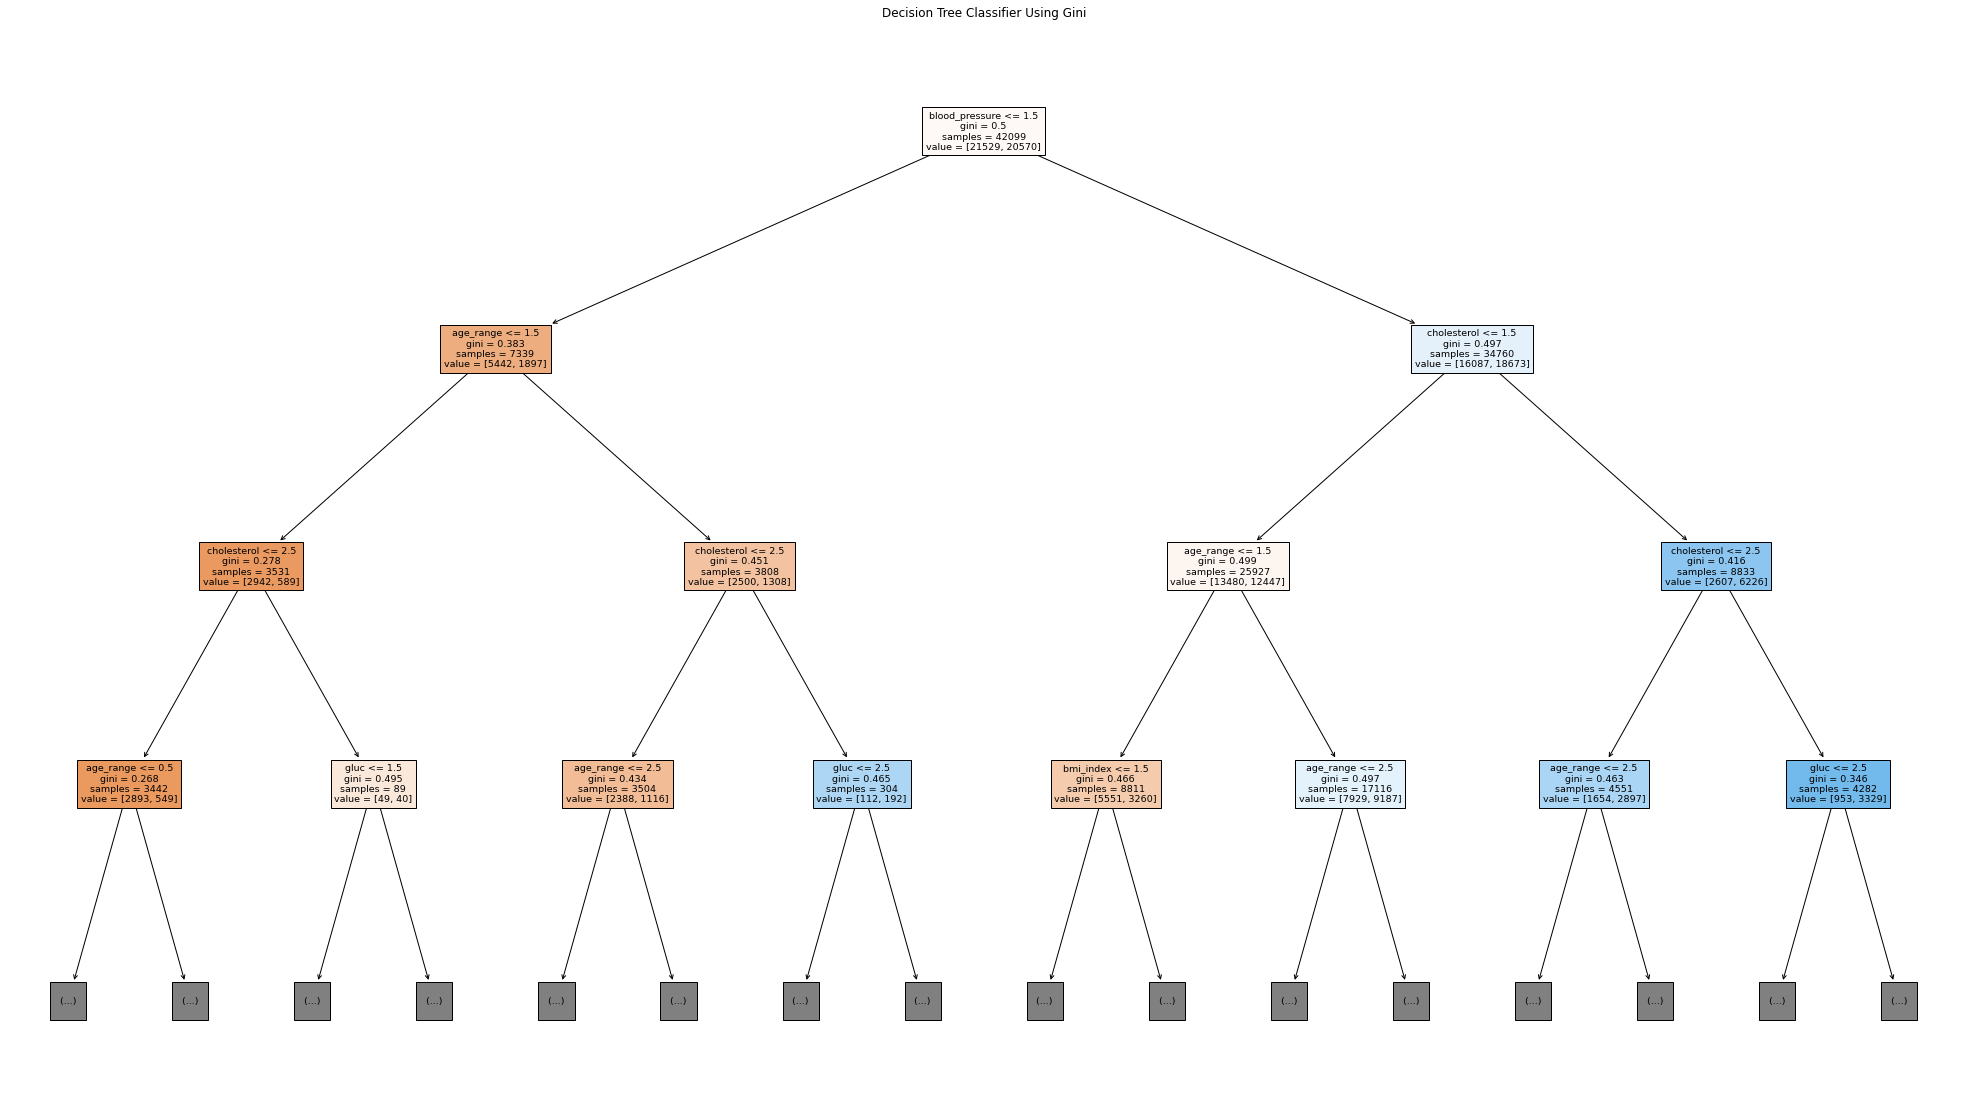

In [104]:
#To save the Decision Tree visulazation using gini to measure the quality of split with max_depth =3 
#As without max_depth specification, it is difficult to view the visualization as it streches out a lot
print("\nClassification Tree using gini with max depth 3:")
#Specifying the size of the figure
plt.figure(figsize=(35,20))
#plotting the tree
plot_tree(gini_clf,feature_names=["gender","cholesterol","gluc","smoke","alco","active","bmi_index","blood_pressure","age_range"],max_depth=3, filled=True)
#Specifying the title
plt.title("Decision Tree Classifier Using Gini")
#To show the plot
plt.show()

Entropy is used to measure quality of Split 

Confusion Matrix: 
 [[5866 3384]
 [3164 5629]]


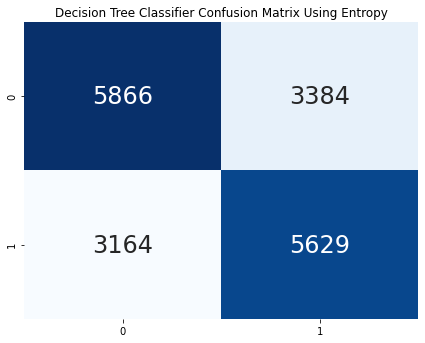


Classification Report Using Entropy:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      9250
           1       0.62      0.64      0.63      8793

    accuracy                           0.64     18043
   macro avg       0.64      0.64      0.64     18043
weighted avg       0.64      0.64      0.64     18043


Classification Tree Using Entropy:



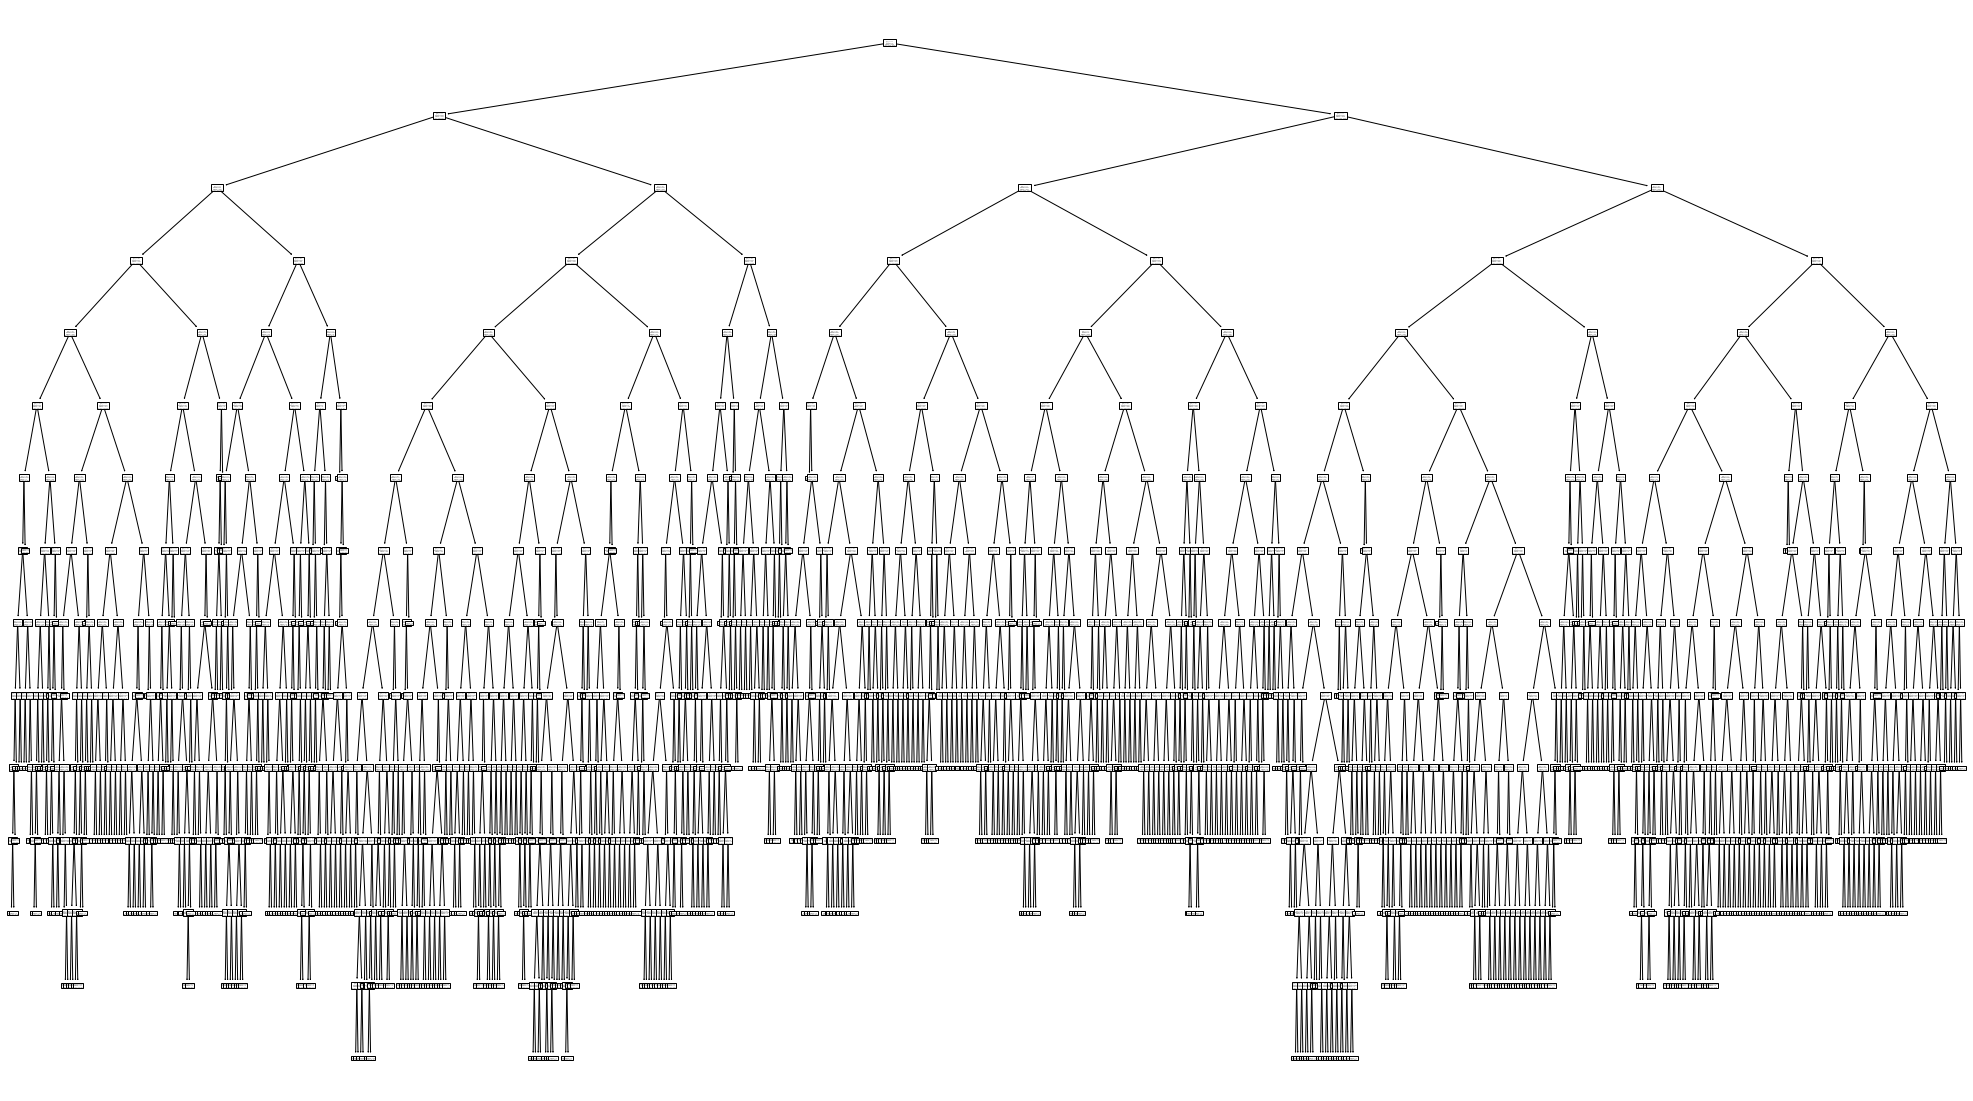

In [105]:
##External Citation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html ##

#entropy_clf is the Decision Tree Classifier with entropy to measure the quality of split.
entropy_clf = DecisionTreeClassifier(criterion="entropy")
#Training the model by fitting it for train data set.
entropy_clf = entropy_clf.fit(X_train, y_train)
#Assigning the predicted values to entropy_y_pred
entropy_y_pred = entropy_clf.predict(X_test)

#Displaying the Confusion Matrix
print("Entropy is used to measure quality of Split \n\nConfusion Matrix: \n",confusion_matrix(y_test, entropy_y_pred))

##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#Specifying the size of the figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying the title
plt.title("Decision Tree Classifier Confusion Matrix Using Entropy")
#plotting the graph
sns.heatmap(confusion_matrix(y_test, entropy_y_pred),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plotted graph
plt.show()

#Displaying the classification Report
print("\nClassification Report Using Entropy:\n",classification_report(y_test, entropy_y_pred))

#Visualization of the Classification Tree
print("\nClassification Tree Using Entropy:\n")
#Specifying the size of the figure
plt.figure(figsize=(35,20))
#plotting the tree
plot_tree(entropy_clf)
#To show the plot
plt.show()



Classification Tree using entropy with max depth 3:


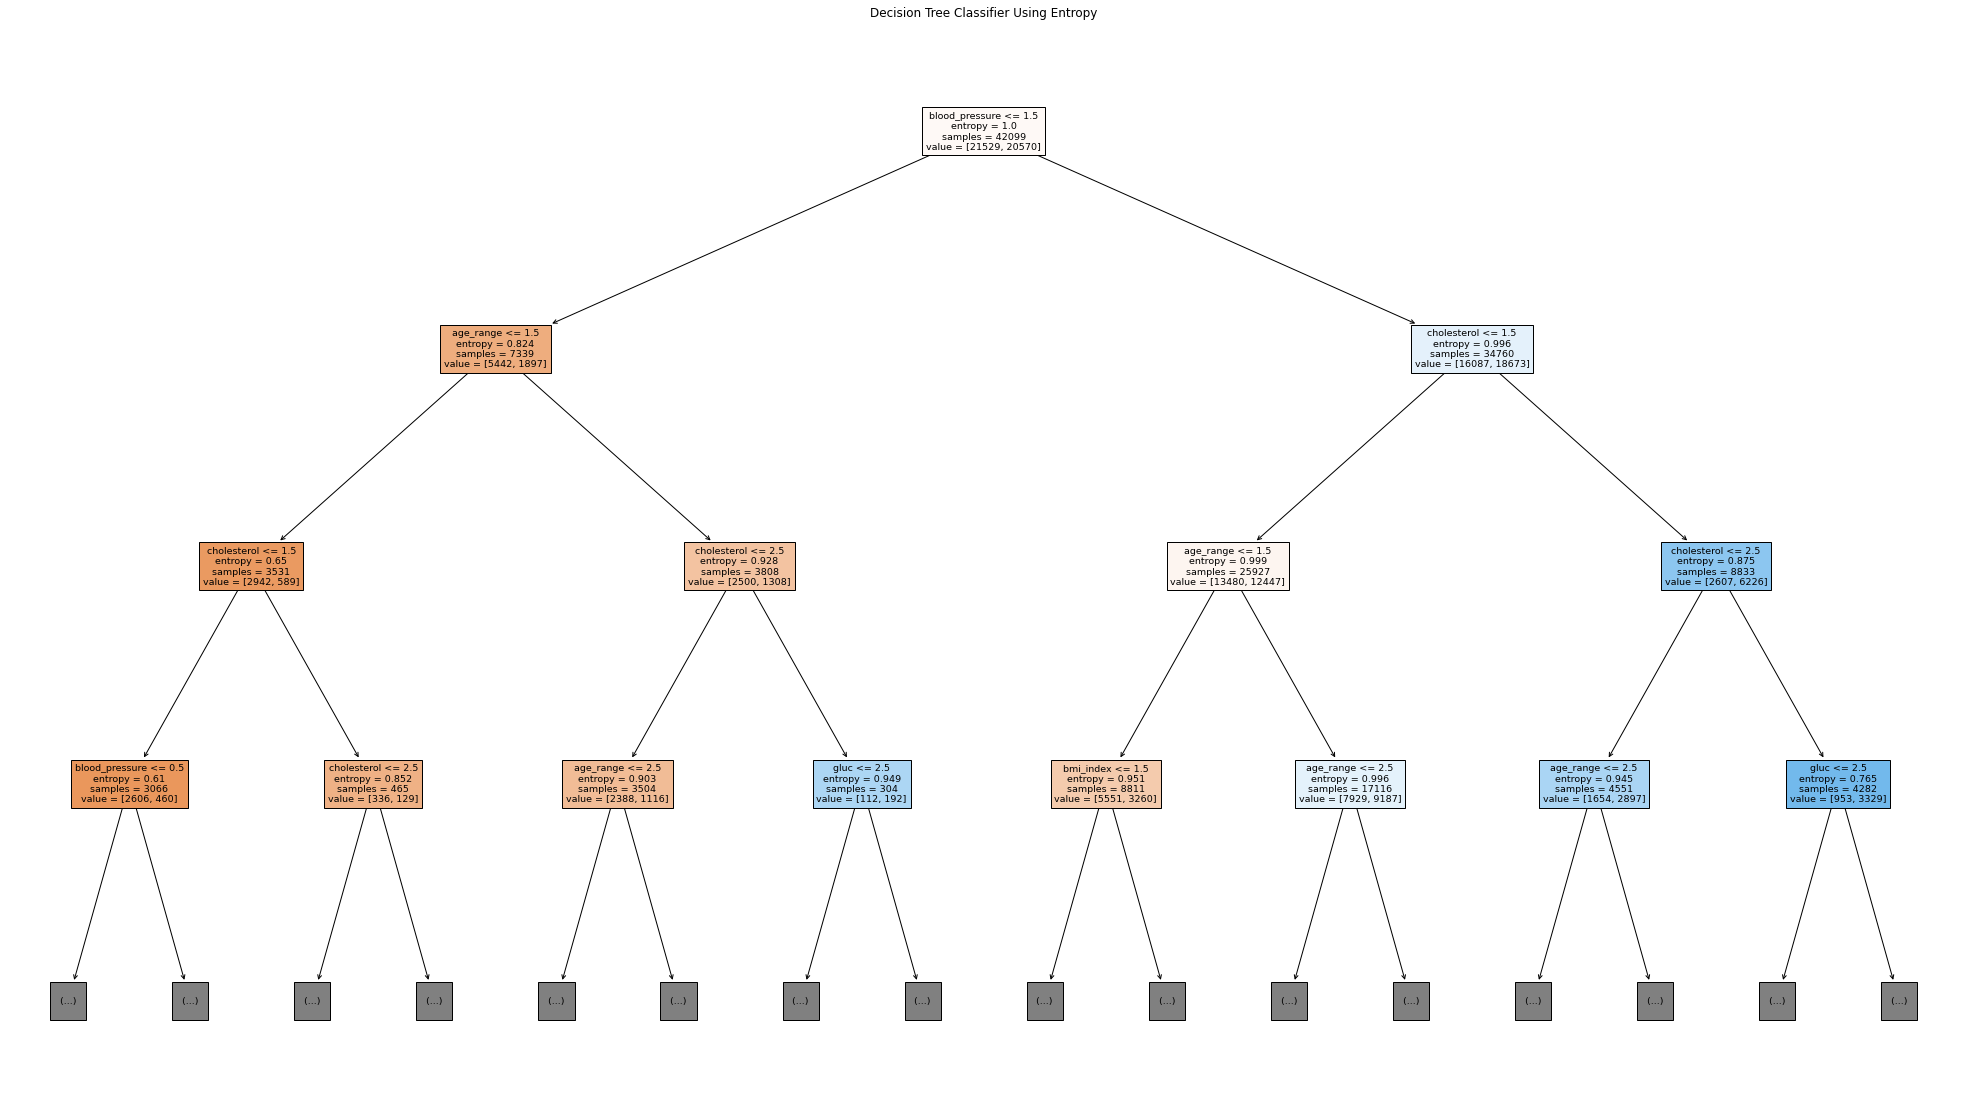

In [106]:
#To save the Decision Tree visulazation using entropy to measure the quality of split with max_depth =3.
#As without max_depth specification, it is difficult to view the visualization as it streches out a lot
print("\nClassification Tree using entropy with max depth 3:")
#Specifying the size of the figure
plt.figure(figsize=(35,20))
#plotting the tree
plot_tree(entropy_clf,feature_names=["gender","cholesterol","gluc","smoke","alco","active","bmi_index","blood_pressure","age_range"],max_depth=3, filled=True)
#Specifying the title
plt.title("Decision Tree Classifier Using Entropy")
#To show the plot
plt.show() 

# Naive Bayes (10 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [4 points]

Confusion Matrix of Bayes Classifier: 
 [[4725 4538]
 [4370 4410]]


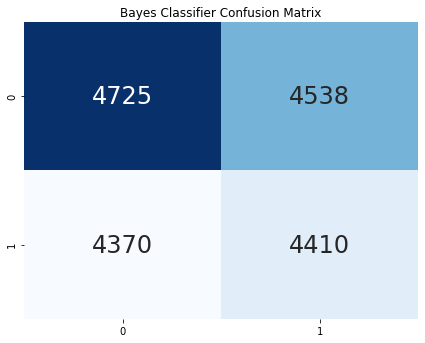


Classification Report of Bayes Classifier:
               precision    recall  f1-score   support

           0       0.52      0.51      0.51      9263
           1       0.49      0.50      0.50      8780

    accuracy                           0.51     18043
   macro avg       0.51      0.51      0.51     18043
weighted avg       0.51      0.51      0.51     18043



In [107]:
from sklearn.naive_bayes import GaussianNB

#Labels
Y = df['cardio']
#Features
X = df.drop(['cardio'], axis = 1)
#Splitting 70% of dataset for training, and 30% for testing the model.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

#Using Naive bayes classifier (Gaussian) classifer
nb = GaussianNB()
#Training the model by fitting the train data.
nb.fit(x_train, y_train)
#y_predict consist of predicted values.
y_predict = nb.predict(X_test)

#To display the Confusion Matrix
print("Confusion Matrix of Bayes Classifier: \n",confusion_matrix(y_test, y_predict))

##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#Specifying the size of the figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying the title of the plot
plt.title("Bayes Classifier Confusion Matrix")
#plotting the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plot
plt.show()

#To display the Classifiaction Report that includes precision, recall, f1-score, and support
print("\nClassification Report of Bayes Classifier:\n",classification_report(y_test, y_predict))